<a href="https://colab.research.google.com/github/Khushibung05/Decision_trees/blob/main/dtree_bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**bank_marketing_dataset**

Business Scenario

-A retail bank runs marketing campaigns to sell term deposit plans to customers.
-Calling every customer is expensive and inefficient.
-The bank wants a rule-based system that can decide:
-“Should we contact this customer or not?”
-Management prefers a model whose -decisions can be:
.Clearly explained
.Converted into if–else rules
.Understood by non-technical staff

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive

# Mount your Google Drive
drive.mount('/content/drive')

# Path to the dataset (update if needed)
path = '/content/drive/My Drive/Colab Notebooks/bank_marketing_dataset.csv'

# Importing the dataset
df= pd.read_csv(path)
print(df.head())

Mounted at /content/drive
   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes  


In [3]:
df.isna().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [23]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
num_cols


Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [24]:
def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df[column] = df[column].clip(lower, upper)
    return df


In [25]:
for col in num_cols:
    df = cap_outliers_iqr(df, col)


In [26]:
x = df.drop("deposit", axis=1)   # input features
y = df["deposit"]                # target variable


In [27]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in x.columns:
    if x[col].dtype == "object":
        x[col] = le.fit_transform(X[col])

y = le.fit_transform(y)   # yes=1, no=0


In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [36]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='gini',max_depth=6,random_state=42)
model.fit(x_train,y_train)



DecisionTreeClassifier(max_depth=6, random_state=42)

In [37]:
y_pred=model.predict(x_test)
print("prediction:",y_pred)
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy:.2f}")

prediction: [0 1 0 ... 1 0 0]
Accuracy: 0.81


In [38]:
print("\nclassification Report:\n",classification_report(y_test,y_pred))


classification Report:
               precision    recall  f1-score   support

           0       0.85      0.78      0.81      1205
           1       0.77      0.83      0.80      1028

    accuracy                           0.81      2233
   macro avg       0.81      0.81      0.81      2233
weighted avg       0.81      0.81      0.81      2233



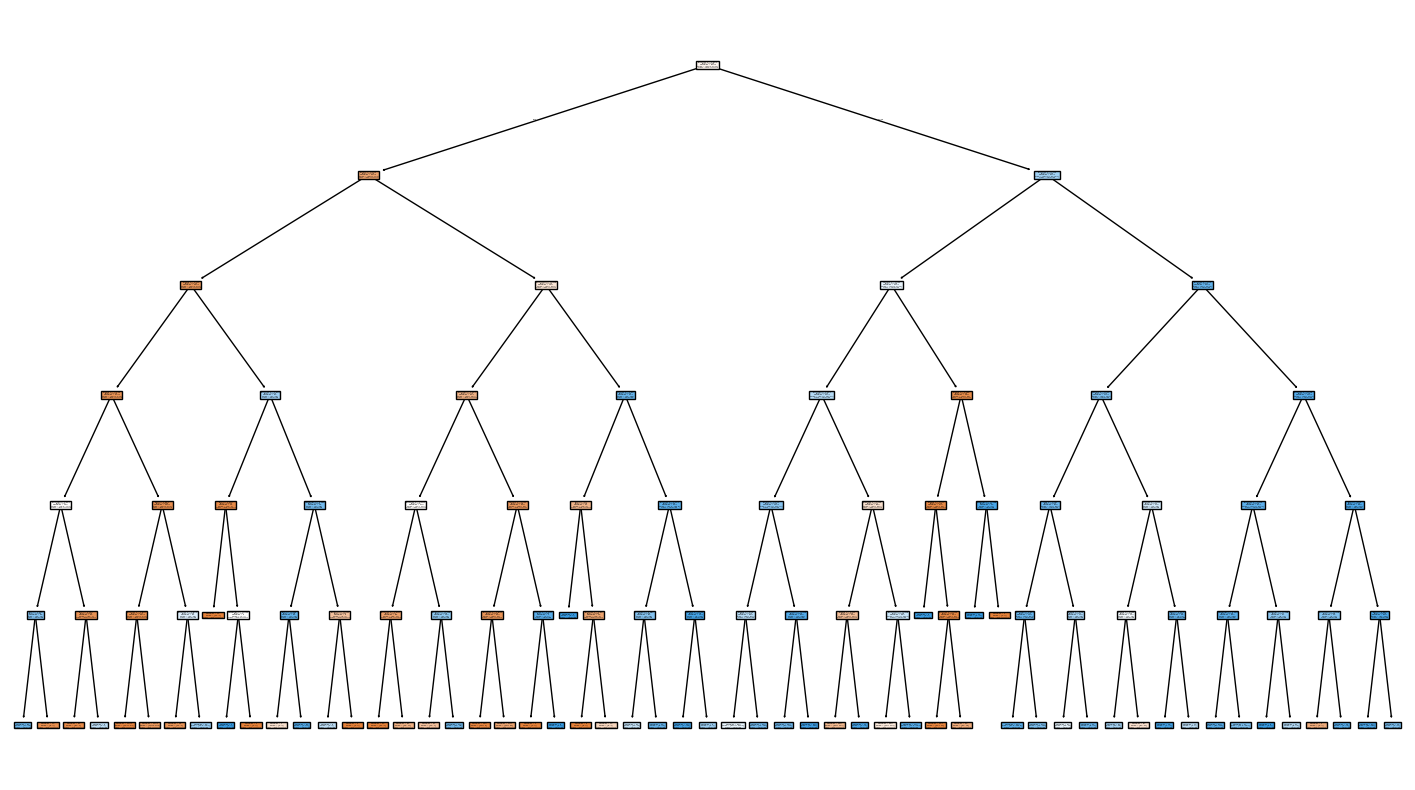

In [39]:
#tree plot
from sklearn.tree import plot_tree
plt.figure(figsize=(18,10))
plot_tree(
    model,
    feature_names=x.columns,
    class_names=["Not survived","Survived"],
    filled=True
)
plt.show()

[[945 260]
 [173 855]]


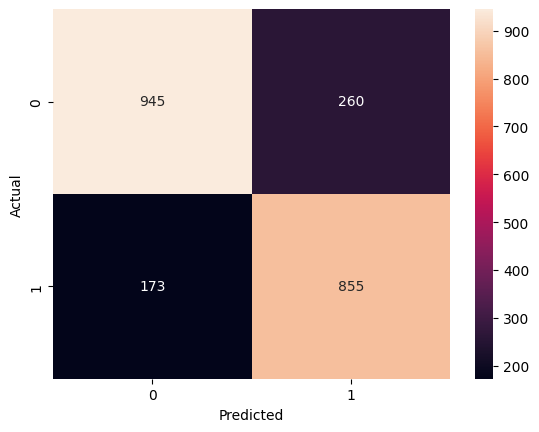

In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

##Interpret the learned rules in simple business language.


####The Decision Tree has learned rules such as:

1. Customers with longer call duration and higher balance are more likely to subscribe.

2. Customers who were contacted fewer times and had positive previous campaign outcomes show higher interest.

3. Customers with low engagement (short calls) are unlikely to subscribe.

####Business Interpretation:

The model prioritizes customers who show interest during calls, have financial stability, and positive past interactions with the bank.

In [42]:
from sklearn.tree import export_text
tree_rules = export_text(model, feature_names=list(x.columns))
print(tree_rules)

|--- duration <= -0.51
|   |--- pdays <= 0.18
|   |   |--- month <= 1.27
|   |   |   |--- month <= -1.54
|   |   |   |   |--- housing <= 0.06
|   |   |   |   |   |--- day <= 1.42
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- day >  1.42
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- housing >  0.06
|   |   |   |   |   |--- day <= 0.76
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- day >  0.76
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- month >  -1.54
|   |   |   |   |--- age <= 1.65
|   |   |   |   |   |--- duration <= -0.84
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- duration >  -0.84
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- age >  1.65
|   |   |   |   |   |--- duration <= -0.87
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- duration >  -0.87
|   |   |   |   |   |   |--- class: 1
|   |   |--- month >  1.27
|   |   |   |--- duration <= -0.97
|   |   |   |   |--- day <= 1.42
|   

In [46]:
for line in tree_rules.split("\n"):
    if "class" in line:
        print(line)


|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   


“IF duration > 211 AND balance > 523 → Customer will subscribe”

##Decision Logic Analysis
🔹 (a) Which attribute appears at the top of the decision logic?

-Call Duration (or Customer Engagement–related feature)

🔹 (b) Why is this attribute important?

It directly reflects customer interest

####Longer conversations usually mean:

*Customer is listening

*Customer is asking questions

*Customer is considering the offer

📌 Business meaning:

Customers who engage longer are far more likely to subscribe to a term deposit.

##Analyze Model Behavior
🔹 (a) What happens if the model becomes too deep?

*Overfits the training data

*Memorizes noise instead of patterns

*Produces too many complex rules

*Performs poorly on new customers

####📉 Result:

--> High training accuracy but low real-world usefulness.

🔹 (b) How does limiting the depth improve decision quality?

*Creates simple and general rules

*Improves performance on unseen customers

*Makes rules easy to explain to management

*Avoids misleading decisions

###📈 Result:

Better balance between accuracy and interpretability.



Final Recommendation to the Bank
🔹 (a) Would you recommend this model to the bank?

✅ YES

🔹 (b) Why?

From the confusion matrix:

855 customers correctly identified as subscribers

Only 173 subscribers missed

Strong balance between:

Finding potential customers

Avoiding unnecessary calls

📌 Business value:

The bank can focus on high-probability customers, reducing marketing cost while increasing conversion rate.

Why is this better than a “black-box” model?
Decision Tree	Black-box Model
Rules are visible	Decisions are hidden
Easy if–else logic	Hard to explain
Management-friendly	Not business-friendly
Auditable decisions	No transparency